#  Customer Segmentation for a Telecom Operator


---
## ML Clustering Case Study


* Importing relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


* Read and Explore Dataset

In [3]:
df=pd.read_csv("/content/telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("Shape of Data\n")
print(df.shape)
print('------------------------------------------------------------')

print("Data_type")
print(df.dtypes)
print('------------------------------------------------------------')

print("\nInfo. of Data\n")
display(df.info())
print('------------------------------------------------------------')

print("\nValue count in data\n")
for col in df:
  print(f"\nValue count in {col}")
  print(df[col].value_counts())
  print("----------------------------------------------------------")


Shape of Data

(7043, 21)
------------------------------------------------------------
Data_type
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
------------------------------------------------------------

Info. of Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        

None

------------------------------------------------------------

Value count in data


Value count in customerID
customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64
----------------------------------------------------------

Value count in gender
gender
Male      3555
Female    3488
Name: count, dtype: int64
----------------------------------------------------------

Value count in SeniorCitizen
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
----------------------------------------------------------

Value count in Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64
----------------------------------------------------------

Value count in Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
----------------------------------------------------------

Value count in tenure

* Checking for missing values

In [8]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


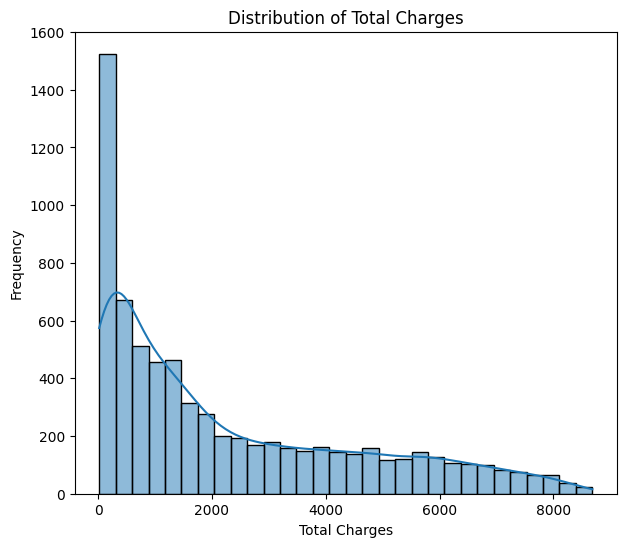

In [17]:
# historgram of total charge column
plt.figure(figsize=(7, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

*Highly Right-Skewed Distribution*


---



* Dealing with missing values in 'Total Charges'
* Converting the feature from object data type to numeric
* Then imputing missing values with median

In [9]:
# Check for missing values in 'TotalCharges'
print(df['TotalCharges'].isnull().sum())

# Check for non-numeric values in 'TotalCharges'
print(df[pd.to_numeric(df['TotalCharges'], errors='coerce').isnull()])

# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Impute missing 'TotalCharges' with the median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# Verify imputation
print(df['TotalCharges'].isnull().sum())

0
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ..

* Checking for duplicates

In [12]:
df.duplicated().sum()

np.int64(0)

* Checking for outliers

In [13]:
numerical = df.select_dtypes(include=['number'])

# Count of outliers in each numerical column
for col in numerical:
  Q1=numerical[col].quantile(0.25)
  Q3=numerical[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  outliers=numerical[(numerical[col]<lower_bound) | (numerical[col]>upper_bound)]
  print(f"\n Count of Outliers in {col}: {len(outliers)}\n")
  print('-----------------------------------------------')



 Count of Outliers in SeniorCitizen: 1142

-----------------------------------------------

 Count of Outliers in tenure: 0

-----------------------------------------------

 Count of Outliers in MonthlyCharges: 0

-----------------------------------------------

 Count of Outliers in TotalCharges: 0

-----------------------------------------------


*Outliers don’t apply on 'Senior Citizen' column since its a binary categorical feature, not a continuous numeric one.*



---




* Feature Engineering


---


* *Encoding all categorical features*

* *Scaling numerical features because K-Means is a distance-based algorithm, and scaling ensures that all features contribute equally to the distance calculations.*

In [14]:
# Feature Selection
features_to_use = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
df_selected = df[features_to_use]

# Encoding categorical features
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
df_encoded = pd.get_dummies(df_selected, columns=categorical_cols, drop_first=True)


# Scaling numerical features
from sklearn.preprocessing import StandardScaler

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

display(df_encoded.head())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.994242,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0.066327,-0.259629,-0.173244,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,-1.236724,-0.362660,-0.959674,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,0.514251,-0.746535,-0.194766,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,-1.236724,0.197365,-0.940470,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


* Finding best K value


---

* *Determining the optimal number of clusters(k) using the Elbow method and Silhouette analysis.*

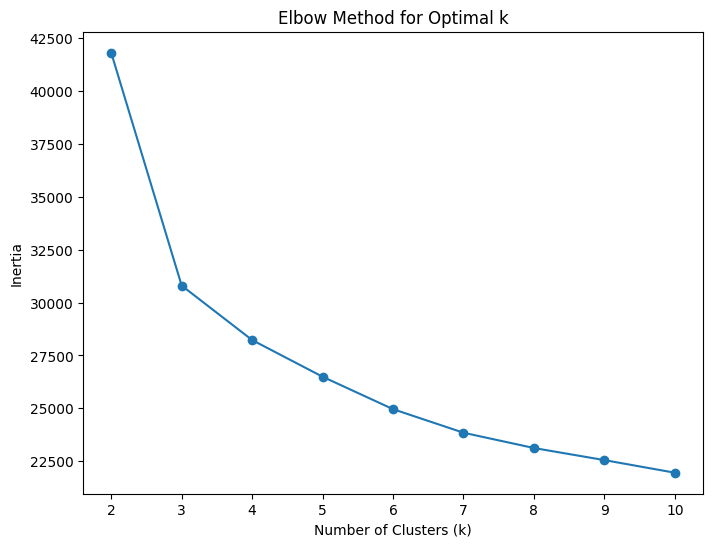

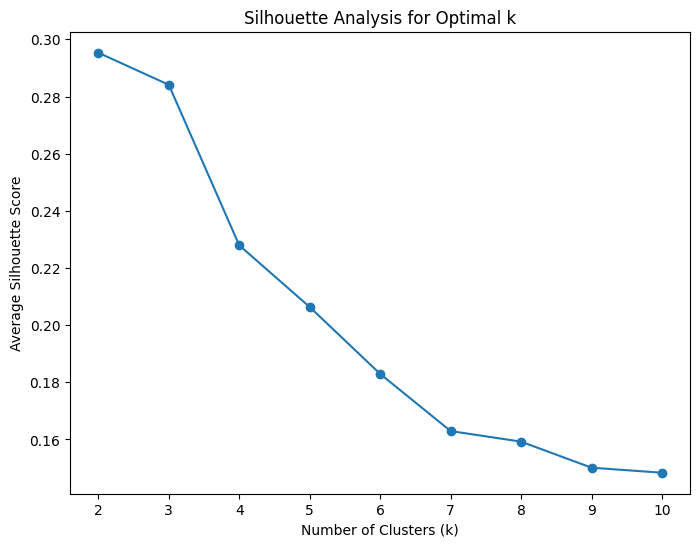

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Use a consistent random state for reproducibility
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_encoded, kmeans.labels_))

# Plot inertia
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

* K Means Clustering


---

* *Clustering with Chosen k*
* *Cluster Stability Check*

In [18]:
# Choosed k based on the Elbow and Silhouette plots (example: k=3)
k = 3

# Applying KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) #(Runing the clustering process 10 times with different random initial centroids)
df_encoded['cluster'] = kmeans.fit_predict(df_encoded)

# Validate cluster stability
stability_scores = []
for seed in range(5):
    kmeans_stable = KMeans(n_clusters=k, random_state=seed, n_init=10)
    labels_stable = kmeans_stable.fit_predict(df_encoded.drop('cluster', axis=1))  # Exclude the existing cluster labels
    stability_scores.append(silhouette_score(df_encoded.drop('cluster', axis=1), labels_stable))

print(f"Cluster stability scores across different random seeds: {stability_scores}")

# Assign cluster labels to the original DataFrame
df['cluster'] = df_encoded['cluster']
display(df.head())

Cluster stability scores across different random seeds: [np.float64(0.2841212273779714), np.float64(0.2841212273779714), np.float64(0.28408036880744275), np.float64(0.28411166463195053), np.float64(0.28410481958148837)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0


* Cluster profiling


---

* *CalculatING the mean and median for continuous features per cluster,it will help compare spending habits, tenure, etc., across clusters.*

* *Collecting the frequency distribution of  categorical features within each cluster, for understanding preferences.*



In [21]:
# Cluster Profiling
cluster_profiles = []
for cluster_num in range(k):
    cluster_data = df[df['cluster'] == cluster_num]
    profile = {
        'cluster': cluster_num,
        'size': len(cluster_data),
    }
    for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
        profile[col + '_mean'] = cluster_data[col].mean()
        profile[col + '_median'] = cluster_data[col].median()
    for col in ['InternetService', 'Contract', 'PaymentMethod']:
      profile[col + '_counts'] = cluster_data[col].value_counts().to_dict()
    cluster_profiles.append(profile)

cluster_profile_df = pd.DataFrame(cluster_profiles)
display(cluster_profile_df)


,cluster,size,tenure_mean,tenure_median,MonthlyCharges_mean,MonthlyCharges_median,TotalCharges_mean,TotalCharges_median,InternetService_counts,Contract_counts,PaymentMethod_counts
0,0,3265,15.559571,12.0,67.989296,70.40,1035.465199,816.8,"{'Fiber optic': 1666, 'DSL': 1599}","{'Month-to-month': 2759, 'One year': 408, 'Two...","{'Electronic check': 1576, 'Mailed check': 703..."
1,1,2252,57.980906,60.0,89.682371,93.35,5182.605373,5017.8,"{'Fiber optic': 1430, 'DSL': 822}","{'Two year': 959, 'One year': 701, 'Month-to-m...","{'Bank transfer (automatic)': 714, 'Credit car..."
2,2,1526,30.547182,25.0,21.079194,20.15,668.099443,528.5,{'No': 1526},"{'Two year': 638, 'Month-to-month': 524, 'One ...","{'Mailed check': 741, 'Bank transfer (automati..."


* Adding business-friendly labels to  clusters

In [22]:
# Identify distinctive traits and assign business labels
# This part requires careful analysis of the cluster profiles.
# Replace these examples with actual insights from your analysis.
business_labels = {
    0: "Budget-conscious",
    1: "Mid-range loyalists",
    2: "High-value users"
}

print("Cluster Profiles with Business Labels:\n")
for profile in cluster_profiles:
  print(f"Cluster {profile['cluster']} ({business_labels[profile['cluster']]} ): {profile}")

Cluster Profiles with Business Labels:

Cluster 0 (Budget-conscious ): {'cluster': 0, 'size': 3265, 'tenure_mean': np.float64(15.559571209800918), 'tenure_median': 12.0, 'MonthlyCharges_mean': np.float64(67.98929555895864), 'MonthlyCharges_median': 70.4, 'TotalCharges_mean': np.float64(1035.4651990811637), 'TotalCharges_median': 816.8, 'InternetService_counts': {'Fiber optic': 1666, 'DSL': 1599}, 'Contract_counts': {'Month-to-month': 2759, 'One year': 408, 'Two year': 98}, 'PaymentMethod_counts': {'Electronic check': 1576, 'Mailed check': 703, 'Bank transfer (automatic)': 498, 'Credit card (automatic)': 488}}
Cluster 1 (Mid-range loyalists ): {'cluster': 1, 'size': 2252, 'tenure_mean': np.float64(57.980905861456485), 'tenure_median': 60.0, 'MonthlyCharges_mean': np.float64(89.68237122557727), 'MonthlyCharges_median': 93.35, 'TotalCharges_mean': np.float64(5182.605373001777), 'TotalCharges_median': 5017.799999999999, 'InternetService_counts': {'Fiber optic': 1430, 'DSL': 822}, 'Contract

* PCA-based cluster visualization


---

* *Reducing high-dimensional data into 2 principal components*
* *Creating  scatter plot where color shows cluster membership.*
* *Boxplots for continuous features (tenure, MonthlyCharges).*
* *Countplots for categorical features (InternetService, Contract)*



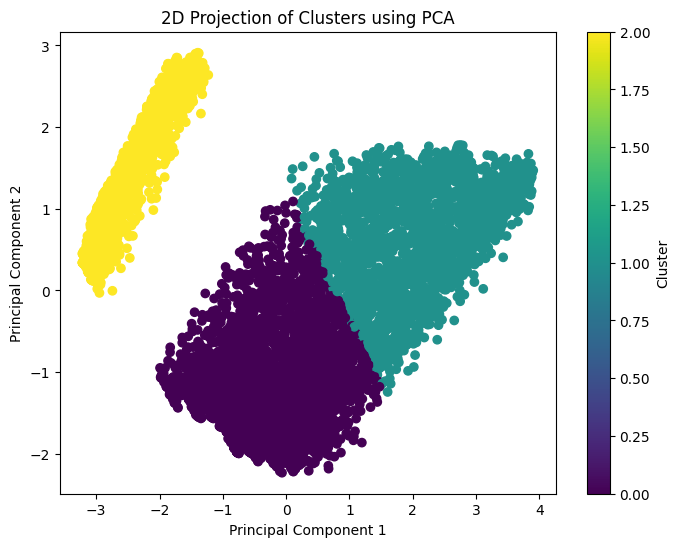

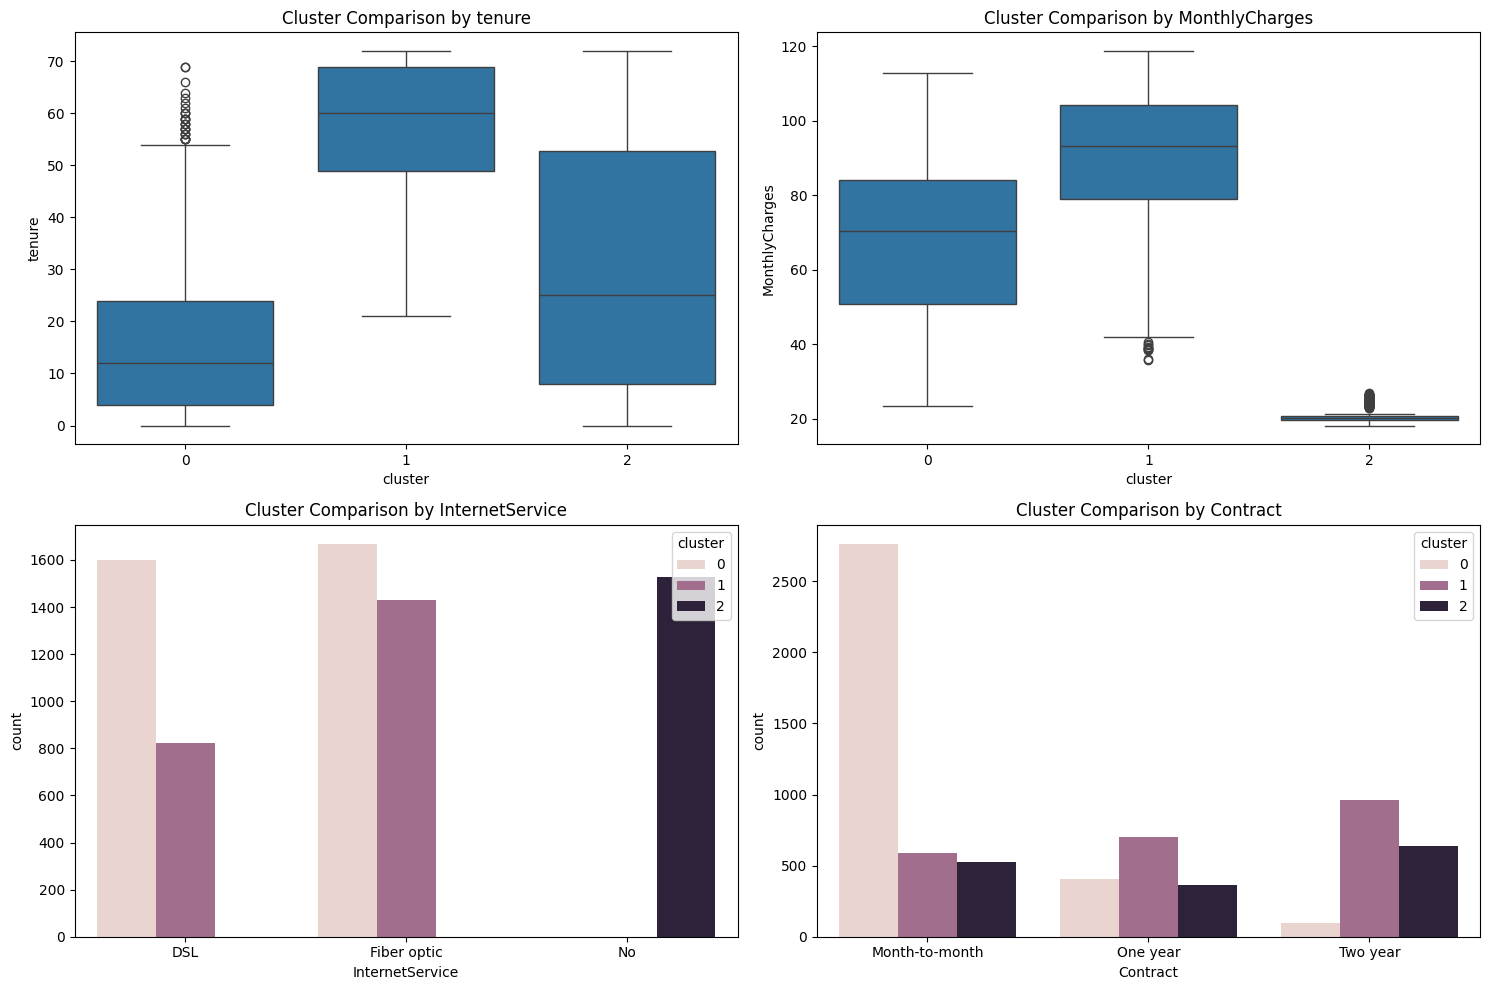

In [23]:
from sklearn.decomposition import PCA

# 2D Projection using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_encoded.drop('cluster', axis=1))

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_encoded['cluster'], cmap='viridis')
plt.title('2D Projection of Clusters using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Feature comparison charts
features_to_plot = ['tenure', 'MonthlyCharges', 'InternetService', 'Contract']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature in ['tenure', 'MonthlyCharges']:
        sns.boxplot(x='cluster', y=feature, data=df, ax=axes[i])
    else:
        sns.countplot(x=feature, hue='cluster', data=df, ax=axes[i])
    axes[i].set_title(f'Cluster Comparison by {feature}')

plt.tight_layout()
plt.show()

#Telco Customer Segmentation: Project Summary


---


1. **Data Loading & Exploration**

* Loaded the telco.csv dataset to examine the structure, data types, and detect issues like missing values.

* Identified that the TotalCharges column contained non-numeric entries and missing values.

2. **Data Preprocessing**

* Converted TotalCharges to numeric with errors='coerce' to handle non-numeric entries.

* Imputed missing TotalCharges values using median.

 *Checked for and handled duplicate records.*

* Identified outliers in continuous variables (tenure, MonthlyCharges, TotalCharges) using boxplots.

* Outlier detection was skipped for binary categorical columns like SeniorCitizen where it’s not meaningful.

3. **Feature Engineering**

* Selected relevant features for clustering based on business logic.

* Applied One-Hot Encoding to categorical variables.

* Scaled numerical features using StandardScaler to ensure uniform contribution to distance metrics.

4. **Determining Optimal Number of Clusters (k)**
* Used the Elbow Method to analyze KMeans inertia.

* Used Silhouette Score to validate cluster separation and compactness.

* Selected optimal k (e.g., k=3) based on both metrics.

5. **K-Means Clustering**
* Applied KMeans clustering with the chosen k and n_init=10 to ensure stable results.

* Checked cluster stability by rerunning KMeans with different random seeds and computing silhouette scores across runs.

* Assigned resulting cluster labels to the original DataFrame.

6. **Cluster Profiling**

Analyzed cluster characteristics by calculating:

* Mean and median for continuous features (tenure, MonthlyCharges, TotalCharges).

* Frequency distributions for categorical variables (InternetService, Contract, PaymentMethod).

* Created a summarized cluster profile for easy interpretation.

7. **Business Labeling**

* Assigned descriptive labels to clusters (e.g., "Budget-conscious", "Mid-range loyalists", "High-value users"), aiding business teams in interpreting the segments.

* Mapped these labels back to the customer data.

8. **Cluster Visualization**

* Applied PCA (Principal Component Analysis) to reduce the feature space to 2D for visualization.

* Created a scatter plot of the PCA-transformed data colored by cluster label.

* Used boxplots and countplots to compare feature distributions across clusters.



